### LOANS are the major requirement of the modern world. By this only, Banks get a major part of the total profit. It is beneficial for students to manage their education and living expenses, and for people to buy any kind of luxury like houses, cars, etc.

But when it comes to deciding whether the applicant’s profile is relevant to be granted with loan or not. Banks have to look after many aspects.

So, here we will be using Machine Learning with Python to ease their work and predict whether the candidate’s profile is relevant or not using key features like Marital Status, Education, Applicant Income, Credit History, etc.

The dataset contains 13 features : 

- 1	Loan	A unique id 
- 2	Gender	Gender of the applicant Male/female
- 3	Married	Marital Status of the applicant, values will be Yes/ No
- 4	Dependents	It tells whether the applicant has any dependents or not.
- 5	Education	It will tell us whether the applicant is Graduated or not.
- 6	Self_Employed	This defines that the applicant is self-employed i.e. Yes/ No
- 7	ApplicantIncome	Applicant income
- 8	CoapplicantIncome	Co-applicant income
- 9	LoanAmount	Loan amount (in thousands)
- 10	Loan_Amount_Term	Terms of loan (in months)
- 11	Credit_History	Credit history of individual’s repayment of their debts
- 12	Property_Area	Area of property i.e. Rural/Urban/Semi-urban 
- 13	Loan_Status	Status of Loan Approved or not i.e. Y- Yes, N-No 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("LoanApprovalPrediction.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df['Gender'].value_counts()

Male      487
Female    111
Name: Gender, dtype: int64

In [6]:
#Get the number of columns of object datatype.
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [7]:
#As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

### Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.

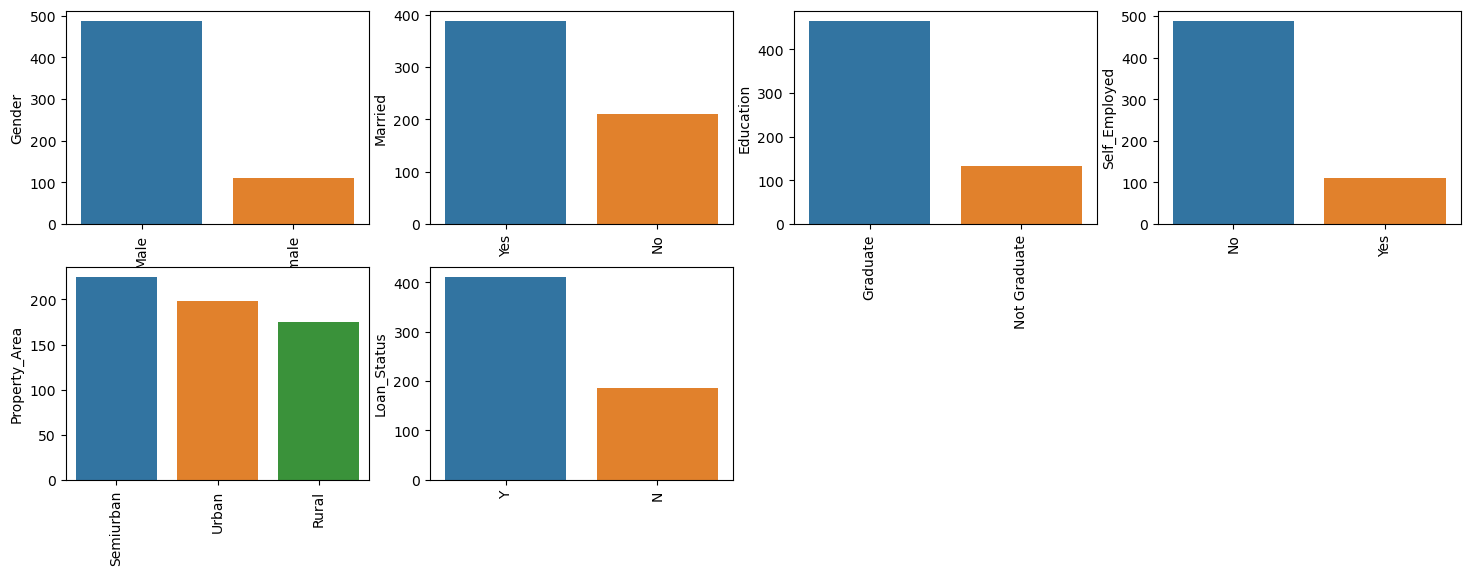

In [8]:

obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = df[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [9]:
#As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.
# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
#Again check the object datatype columns. Let’s find out if there is still any left.

# To find the number of columns with 
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [11]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.175970,0.048478,-0.028663,0.057386,0.083080,0.106712,-0.083462,0.017336,-0.025794,0.021239
Married,0.369612,1.000000,0.350464,0.014369,-0.021441,0.042487,0.073830,0.147602,-0.102360,0.013565,0.009224,0.093183
Dependents,0.175970,0.350464,1.000000,0.059227,0.040892,0.084485,0.034596,0.131023,-0.100326,-0.046950,0.007816,0.003048
Education,0.048478,0.014369,0.059227,1.000000,-0.015204,-0.139349,-0.065205,-0.169563,-0.080760,-0.075207,-0.061758,-0.081617
Self_Employed,-0.028663,-0.021441,0.040892,-0.015204,1.000000,0.140406,0.020877,0.118304,-0.034053,0.030774,-0.023149,-0.005605
ApplicantIncome,0.057386,0.042487,0.084485,-0.139349,0.140406,1.000000,-0.109235,0.529965,-0.035388,-0.031028,-0.023432,-0.025248
CoapplicantIncome,0.083080,0.073830,0.034596,-0.065205,0.020877,-0.109235,1.000000,0.207045,-0.060404,0.003011,0.015155,-0.058194
LoanAmount,0.106712,0.147602,0.131023,-0.169563,0.118304,0.529965,0.207045,1.000000,0.049346,-0.021177,-0.056637,-0.055643
Loan_Amount_Term,-0.083462,-0.102360,-0.100326,-0.080760,-0.034053,-0.035388,-0.060404,0.049346,1.000000,0.005528,-0.072521,-0.017554
Credit_History,0.017336,0.013565,-0.046950,-0.075207,0.030774,-0.031028,0.003011,-0.021177,0.005528,1.000000,-0.008533,0.557308


<Axes: >

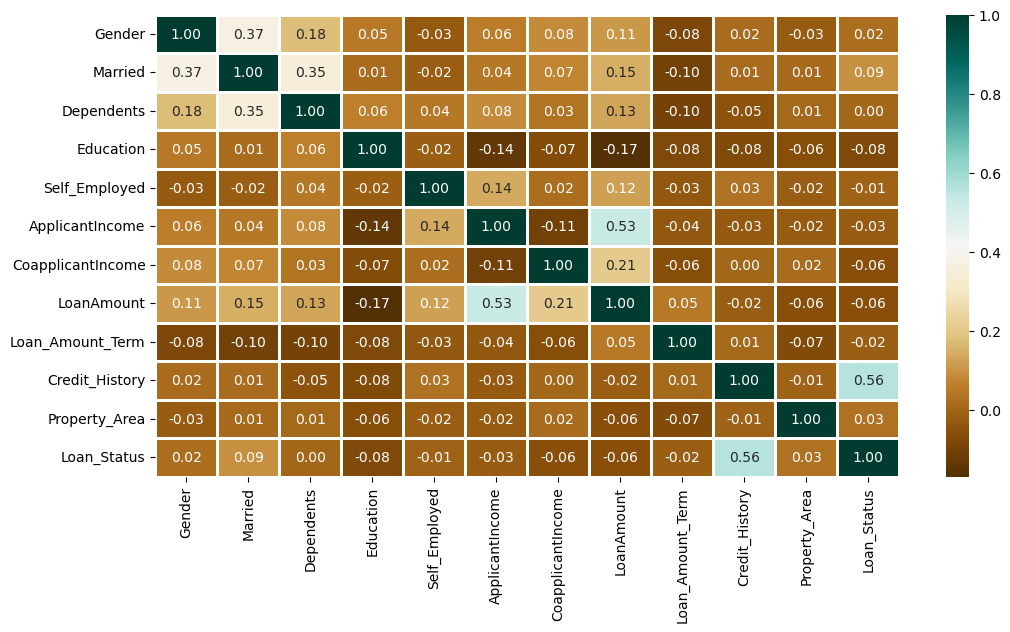

In [12]:
plt.figure(figsize=(12,6))
  
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

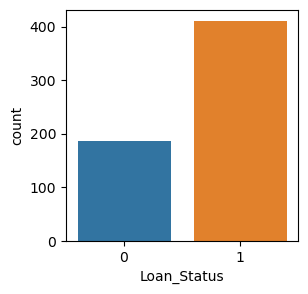

In [13]:
plt.figure(figsize=(3,3))
sns.countplot(x='Loan_Status',data=df)
plt.show()

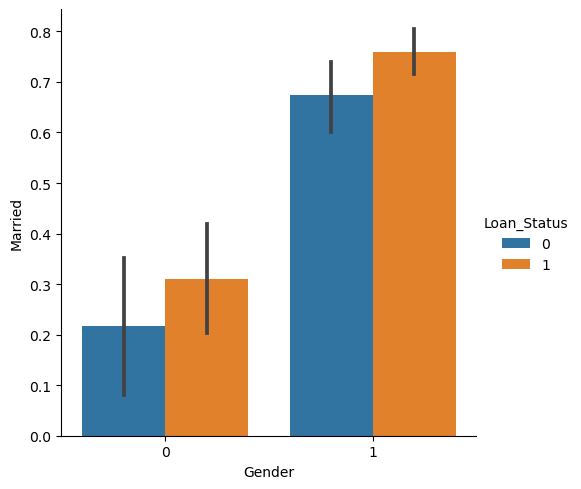

In [14]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=df)

In [15]:
#Now we will find out if there is any missing values in the dataset using below code.
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean()) 
    
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df['Gender'].value_counts()

1    487
0    111
Name: Gender, dtype: int64

In [17]:
#Splitting Dataset 
from sklearn.model_selection import train_test_split
  
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']
x.shape,y.shape
  


((598, 11), (598,))

In [18]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0
594,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0
595,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2
596,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2


In [19]:
y

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int32

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [21]:
#Model Training and Evaluation
#As this is a classification problem so we will be using these models :
#KNeighborsClassifiers
#RandomForestClassifiers
#Support Vector Classifiers (SVC)
#Logistics Regression


In [22]:
def mymodel(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    print(classification_report(y_test,ypred))
    return model

In [23]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

### # 1.---> LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)

In [25]:
ac=accuracy_score(y_test,ypred)
cr=classification_report(y_test,ypred)
print(ac)
print(cr)

0.8
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        73
           1       0.81      0.94      0.87       167

    accuracy                           0.80       240
   macro avg       0.79      0.71      0.73       240
weighted avg       0.80      0.80      0.78       240



In [26]:
logreg=LogisticRegression(solver="liblinear")
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)

In [27]:
ac=accuracy_score(y_test,ypred)
cr=classification_report(y_test,ypred)
print(ac)
print(cr)

0.8083333333333333
              precision    recall  f1-score   support

           0       0.81      0.48      0.60        73
           1       0.81      0.95      0.87       167

    accuracy                           0.81       240
   macro avg       0.81      0.72      0.74       240
weighted avg       0.81      0.81      0.79       240



In [28]:
logreg=LogisticRegression(solver='newton-cg')
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        73
           1       0.81      0.97      0.88       167

    accuracy                           0.82       240
   macro avg       0.84      0.72      0.75       240
weighted avg       0.83      0.82      0.80       240



LogisticRegression(solver='newton-cg')

In [29]:
logreg=LogisticRegression(solver='lbfgs')
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.78      0.48      0.59        73
           1       0.81      0.94      0.87       167

    accuracy                           0.80       240
   macro avg       0.79      0.71      0.73       240
weighted avg       0.80      0.80      0.78       240



LogisticRegression()

### 2.---> SVM (Support Vector Machine)

In [30]:
svm=SVC()
mymodel(svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.69      0.99      0.82       167

    accuracy                           0.69       240
   macro avg       0.35      0.50      0.41       240
weighted avg       0.48      0.69      0.57       240



SVC()

In [31]:
svm=SVC(kernel='linear')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.79      0.45      0.57        73
           1       0.80      0.95      0.87       167

    accuracy                           0.80       240
   macro avg       0.79      0.70      0.72       240
weighted avg       0.79      0.80      0.78       240



SVC(kernel='linear')

In [32]:
svm=SVC(kernel='poly')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.67      0.03      0.05        73
           1       0.70      0.99      0.82       167

    accuracy                           0.70       240
   macro avg       0.68      0.51      0.44       240
weighted avg       0.69      0.70      0.59       240



SVC(kernel='poly')

In [33]:
svm=SVC(kernel='sigmoid')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.28      0.18      0.22        73
           1       0.69      0.80      0.74       167

    accuracy                           0.61       240
   macro avg       0.49      0.49      0.48       240
weighted avg       0.57      0.61      0.58       240



SVC(kernel='sigmoid')

## 3. KNN (K Nearest Neighbors)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [35]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.29      0.14      0.19        73
           1       0.69      0.86      0.77       167

    accuracy                           0.64       240
   macro avg       0.49      0.50      0.48       240
weighted avg       0.57      0.64      0.59       240



KNeighborsClassifier()

In [36]:
knn=KNeighborsClassifier(n_neighbors=3)
mymodel(knn)

              precision    recall  f1-score   support

           0       0.37      0.26      0.30        73
           1       0.71      0.80      0.75       167

    accuracy                           0.64       240
   macro avg       0.54      0.53      0.53       240
weighted avg       0.61      0.64      0.62       240



KNeighborsClassifier(n_neighbors=3)


## 4. Decision Tree (DT)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [38]:
dt=DecisionTreeClassifier()

In [39]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.51      0.55      0.53        73
           1       0.80      0.77      0.78       167

    accuracy                           0.70       240
   macro avg       0.65      0.66      0.65       240
weighted avg       0.71      0.70      0.70       240



DecisionTreeClassifier()

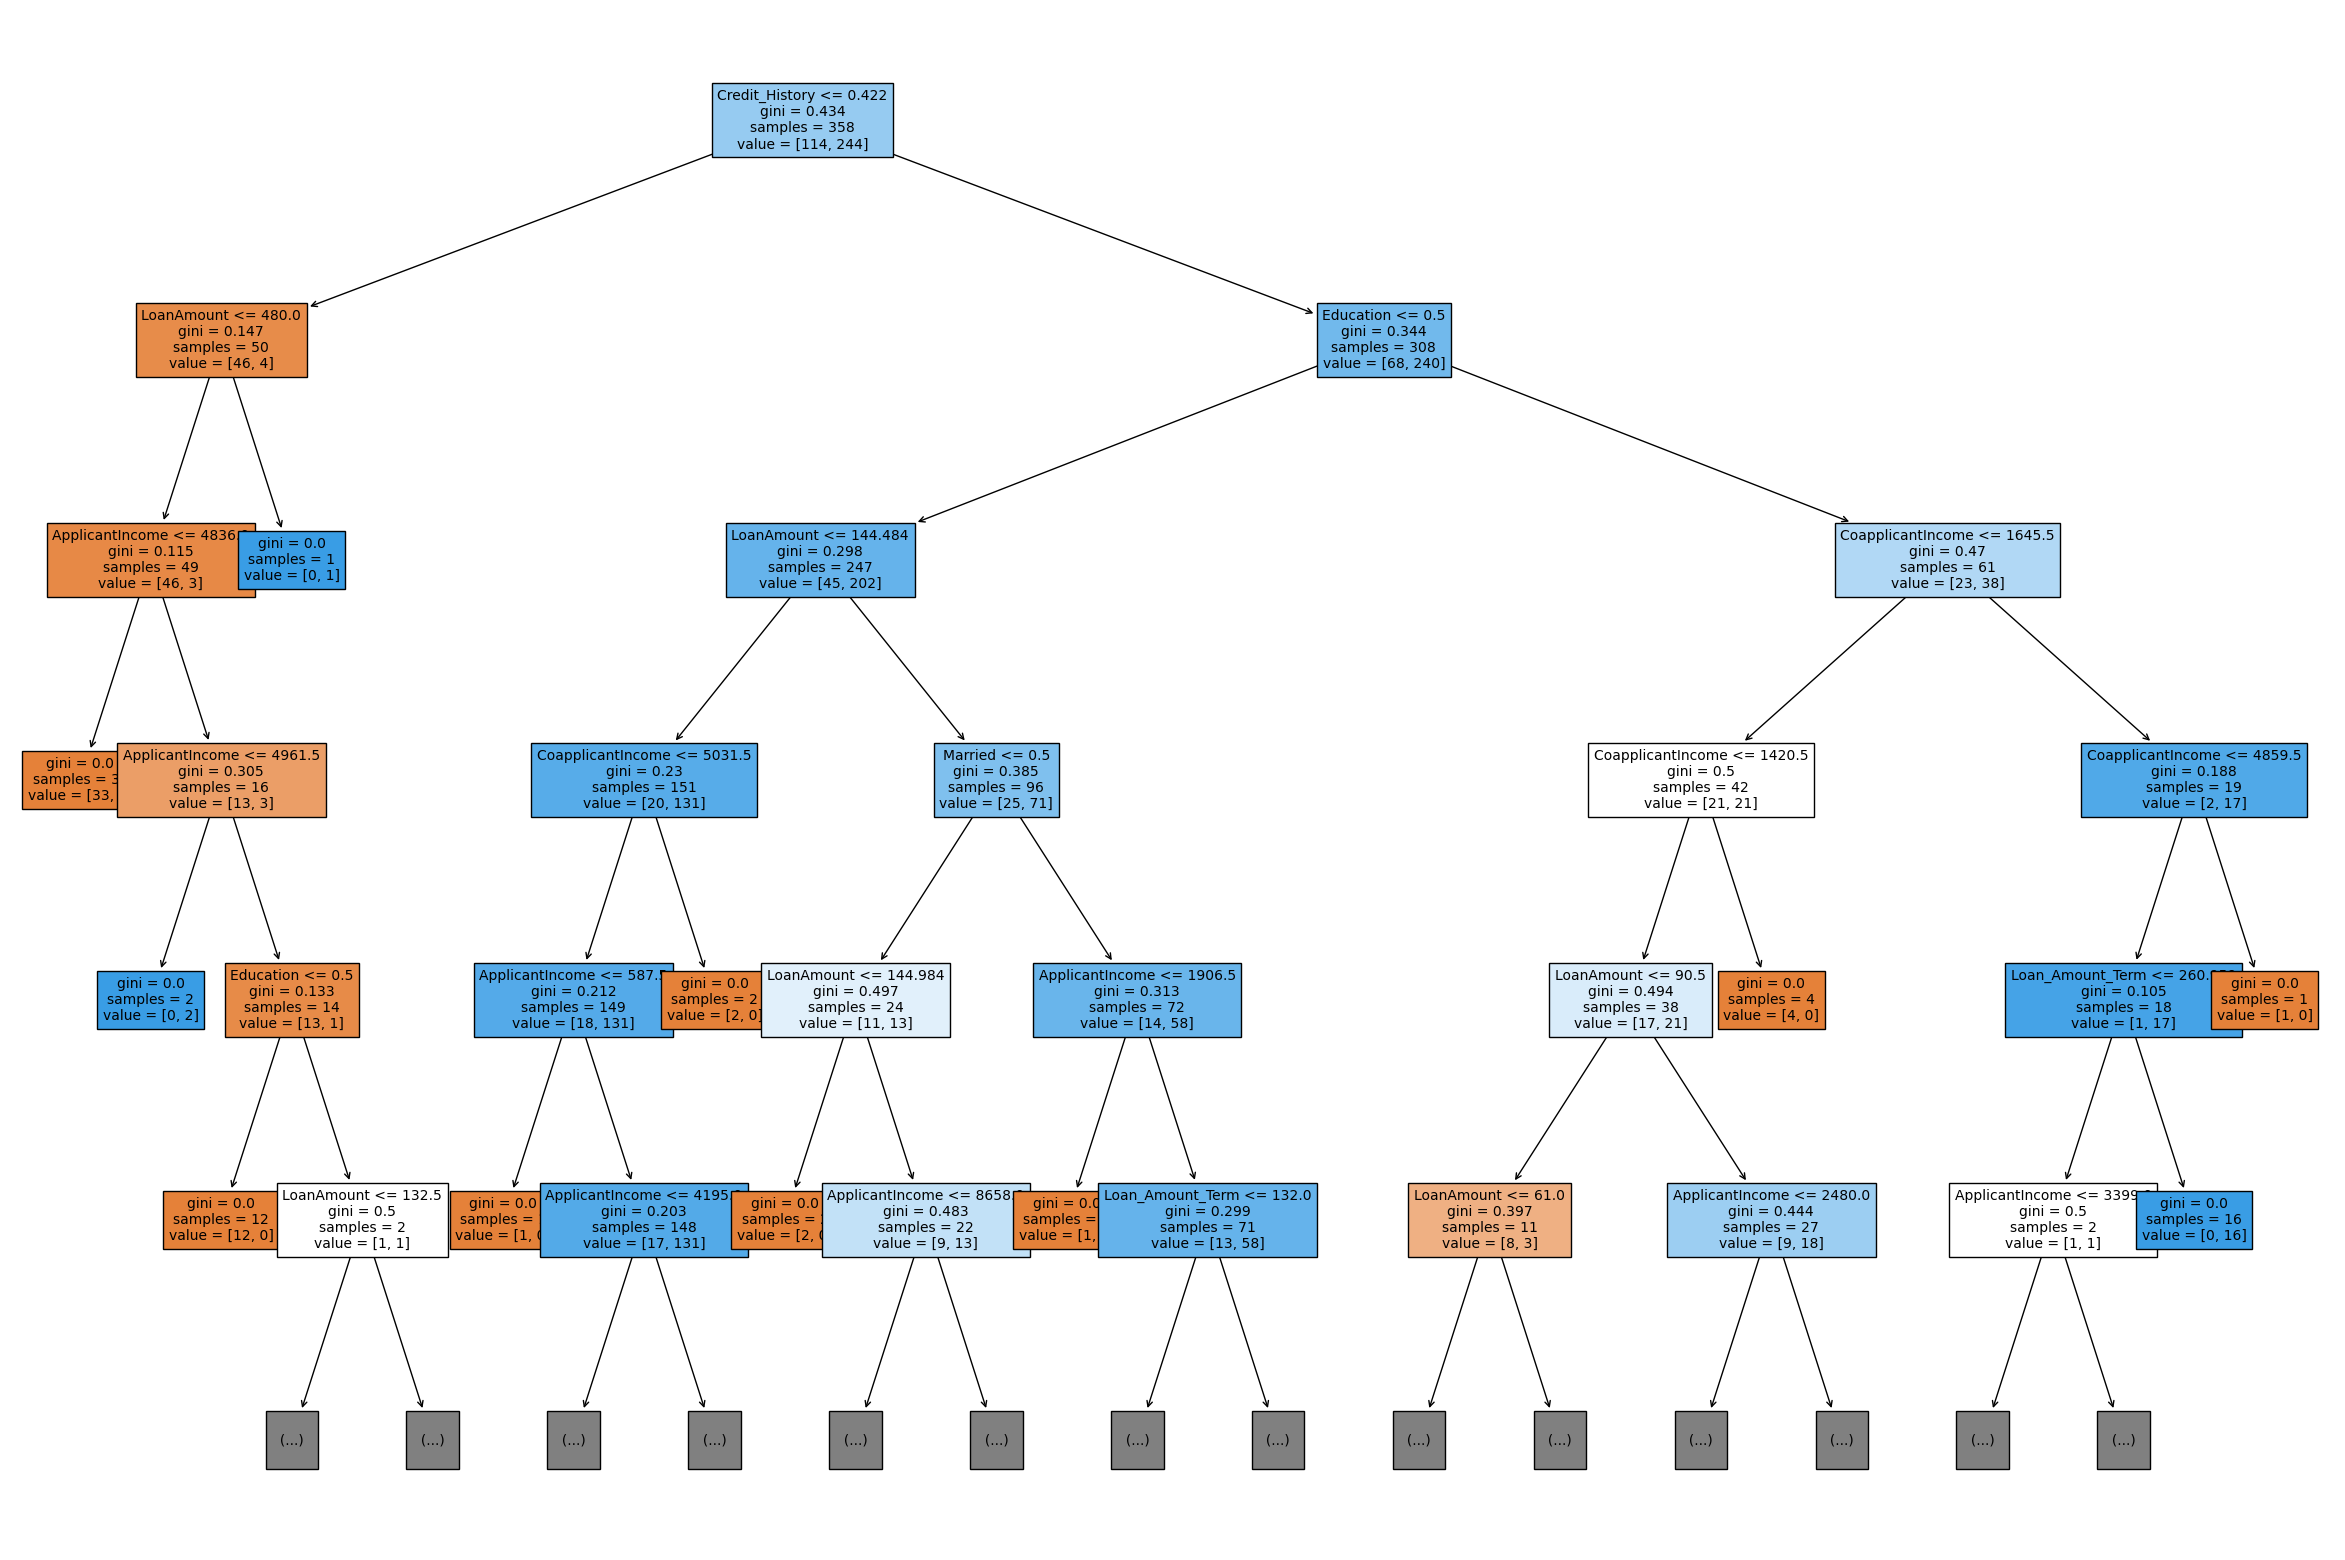

In [40]:
fig,ax=plt.subplots(figsize=(30,20))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=10)
plt.savefig('abc.jpg')

In [41]:
train=dt.score(x_train,y_train)
test=dt.score(x_test,y_test)
print(f'train score :{train} \ntest score: {test}')

train score :1.0 
test score: 0.7


In [42]:
for i in range(1,50):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train,y_train)
    ypred=dt1.predict(x_test)
    ac=accuracy_score(y_test,ypred)
    print(f"max_depth:{i} Accuracy: {ac}")

max_depth:1 Accuracy: 0.8208333333333333
max_depth:2 Accuracy: 0.8166666666666667
max_depth:3 Accuracy: 0.7166666666666667
max_depth:4 Accuracy: 0.775
max_depth:5 Accuracy: 0.75
max_depth:6 Accuracy: 0.7416666666666667
max_depth:7 Accuracy: 0.6875
max_depth:8 Accuracy: 0.7166666666666667
max_depth:9 Accuracy: 0.6958333333333333
max_depth:10 Accuracy: 0.7083333333333334
max_depth:11 Accuracy: 0.6791666666666667
max_depth:12 Accuracy: 0.6958333333333333
max_depth:13 Accuracy: 0.6875
max_depth:14 Accuracy: 0.7
max_depth:15 Accuracy: 0.6875
max_depth:16 Accuracy: 0.6833333333333333
max_depth:17 Accuracy: 0.6958333333333333
max_depth:18 Accuracy: 0.6625
max_depth:19 Accuracy: 0.6875
max_depth:20 Accuracy: 0.6875
max_depth:21 Accuracy: 0.6833333333333333
max_depth:22 Accuracy: 0.6791666666666667
max_depth:23 Accuracy: 0.7
max_depth:24 Accuracy: 0.6916666666666667
max_depth:25 Accuracy: 0.6958333333333333
max_depth:26 Accuracy: 0.7041666666666667
max_depth:27 Accuracy: 0.6875
max_depth:28 Acc

In [43]:
dt2=DecisionTreeClassifier(max_depth=29)
mymodel(dt2)

              precision    recall  f1-score   support

           0       0.48      0.48      0.48        73
           1       0.77      0.77      0.77       167

    accuracy                           0.68       240
   macro avg       0.63      0.63      0.63       240
weighted avg       0.68      0.68      0.68       240



DecisionTreeClassifier(max_depth=29)

In [44]:
train=dt2.score(x_train,y_train)
test=dt2.score(x_test,y_test)
print(f'train score :{train} \ntest score: {test}')

train score :1.0 
test score: 0.6833333333333333


In [45]:
for i in range(10,200):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(x_train,y_train)
    ypred=dt3.predict(x_test)
    ac=accuracy_score(y_test,ypred)
    print(f'min_samples_split: {i} Accuracy: {ac}')

min_samples_split: 10 Accuracy: 0.7
min_samples_split: 11 Accuracy: 0.6833333333333333
min_samples_split: 12 Accuracy: 0.6708333333333333
min_samples_split: 13 Accuracy: 0.6791666666666667
min_samples_split: 14 Accuracy: 0.675
min_samples_split: 15 Accuracy: 0.6791666666666667
min_samples_split: 16 Accuracy: 0.6875
min_samples_split: 17 Accuracy: 0.6916666666666667
min_samples_split: 18 Accuracy: 0.6916666666666667
min_samples_split: 19 Accuracy: 0.6791666666666667
min_samples_split: 20 Accuracy: 0.6916666666666667
min_samples_split: 21 Accuracy: 0.6833333333333333
min_samples_split: 22 Accuracy: 0.6916666666666667
min_samples_split: 23 Accuracy: 0.6958333333333333
min_samples_split: 24 Accuracy: 0.6958333333333333
min_samples_split: 25 Accuracy: 0.7166666666666667
min_samples_split: 26 Accuracy: 0.7333333333333333
min_samples_split: 27 Accuracy: 0.7333333333333333
min_samples_split: 28 Accuracy: 0.7416666666666667
min_samples_split: 29 Accuracy: 0.7416666666666667
min_samples_split: 3

min_samples_split: 197 Accuracy: 0.8208333333333333
min_samples_split: 198 Accuracy: 0.8208333333333333
min_samples_split: 199 Accuracy: 0.8208333333333333


In [46]:
dt6=DecisionTreeClassifier(min_samples_split=72)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        73
           1       0.81      0.97      0.88       167

    accuracy                           0.82       240
   macro avg       0.84      0.72      0.75       240
weighted avg       0.83      0.82      0.80       240



DecisionTreeClassifier(min_samples_split=72)

In [47]:
train=dt6.score(x_train,y_train)
test=dt6.score(x_test,y_test)
print(f'train score :{train} \ntest score: {test}')

train score :0.8100558659217877 
test score: 0.8208333333333333


## ---> Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(LogisticRegression())
bg.fit(x_train,y_train)
ypred=bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        73
           1       0.81      0.97      0.88       167

    accuracy                           0.82       240
   macro avg       0.84      0.72      0.75       240
weighted avg       0.83      0.82      0.80       240



In [49]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(x_train,y_train)
ypred=bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        73
           1       0.84      0.84      0.84       167

    accuracy                           0.78       240
   macro avg       0.74      0.74      0.74       240
weighted avg       0.78      0.78      0.78       240



###  Random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
ypred=rc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.77      0.51      0.61        73
           1       0.81      0.93      0.87       167

    accuracy                           0.80       240
   macro avg       0.79      0.72      0.74       240
weighted avg       0.80      0.80      0.79       240



In [51]:
rc=RandomForestClassifier(n_estimators=7,criterion="entropy",random_state=7)
mymodel(rc)

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        73
           1       0.85      0.92      0.88       167

    accuracy                           0.82       240
   macro avg       0.80      0.77      0.78       240
weighted avg       0.82      0.82      0.82       240



RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7)